In [3]:
#imports and specifications

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#display output inline
%matplotlib inline

In [4]:
file = './data/moviereviews_train.tsv'
movie_data = pd.read_csv(file, sep='\t')

### Step 1: Data Overview ###


In [13]:
print("movie_data is:", type(movie_data))
print("data value type is",type(movie_data.values))
print("movie_data has", movie_data.shape[0], "rows and", movie_data.shape[1], "columns", "\n")
print("the data types for each of the columns in movie_data:")
print(movie_data.dtypes, "\n")
print("the first 10 rows in movie_data:")
print(movie_data.head(5))

movie_data is: <class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
movie_data has 25000 rows and 4 columns 

the data types for each of the columns in movie_data:
id            object
sentiment      int64
review        object
word_count     int64
dtype: object 

the first 10 rows in movie_data:
       id  sentiment                                             review  \
0  5814_8          1  With all this stuff going down at the moment w...   
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...   
2  7759_3          0  The film starts with a manager (Nicholas Bell)...   
3  3630_4          0  It must be assumed that those who praised this...   
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...   

   word_count  
0         433  
1         158  
2         378  
3         379  
4         367  


### Step 2: Create a feature that is word count for each comment

In [6]:
movie_data['word_count'] = movie_data['review'].str.split(' ').str.len()
print(movie_data[["review", "word_count"]].head())

                                              review  word_count
0  With all this stuff going down at the moment w...         433
1  \The Classic War of the Worlds\" by Timothy Hi...         158
2  The film starts with a manager (Nicholas Bell)...         378
3  It must be assumed that those who praised this...         379
4  Superbly trashy and wondrously unpretentious 8...         367


### Step 3: Plot relationship between word count and toxic labels

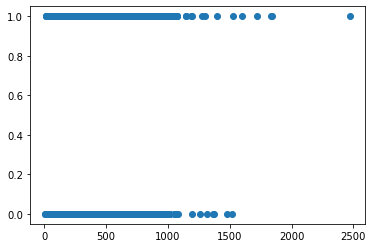

In [7]:
plt.scatter(movie_data["word_count"], movie_data["sentiment"])

### Step 4: Summary Statistics

In [8]:
print("Number of rows of data:",movie_data["sentiment"].count())

Number of rows of data: 25000


In [9]:
print("Avg toxic label value","{0:.2f}%".format(movie_data["sentiment"].mean()*100,"%"))

Avg toxic label value 50.00%


In [10]:
bad_reviews = movie_data.loc[movie_data["sentiment"]==0]
print("Rows and columns respectively for non_toxic data:", bad_reviews.shape)

Rows and columns respectively for non_toxic data: (12500, 4)


In [11]:
this_sample2 = bad_reviews['review'].sample(n=5, random_state=555)
for sample in this_sample2: 
    print(sample, '\n')
    print('* * * * * * *')

I have to admit that i liked the first half of Sleepers. It looked good, the acting was even better, the story of childhood, pain and revenge was interesting and moving. A superior hollywood film. But...No one mentioned this so far (at least in the latest 20 comments), when it came to the courtroom scenes and Brat Pitt´s character followed his plan to rescue his two friends, who are rightly accused of murder, i felt cheated. This movie insulted my intelligence. <br /><br />Warning spoilers!!<br /><br />Why did anyone accept their false alibi, witnessed by the priest? If these two guys had been with him, why shouldn´t they tell this during the investigation? Amnesia? If you were the judge or member of the jury, would you believe it? Is it wise to give the motif of the murderers away?<br /><br />I am sorry, but in the end, the story is very weak, and this angers me. This movie had great potential. 4/10 

* * * * * * *
If there was ever a call to make a bad film that reflected how stupid 